In [69]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [70]:
#Importing Required Libraries for the Project
import numpy as np
import pandas as pd 
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier

In [71]:
#Loading the dataset
cardio_vascular_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/cardio_train.csv", delimiter=";")
cardio_vascular_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


# Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


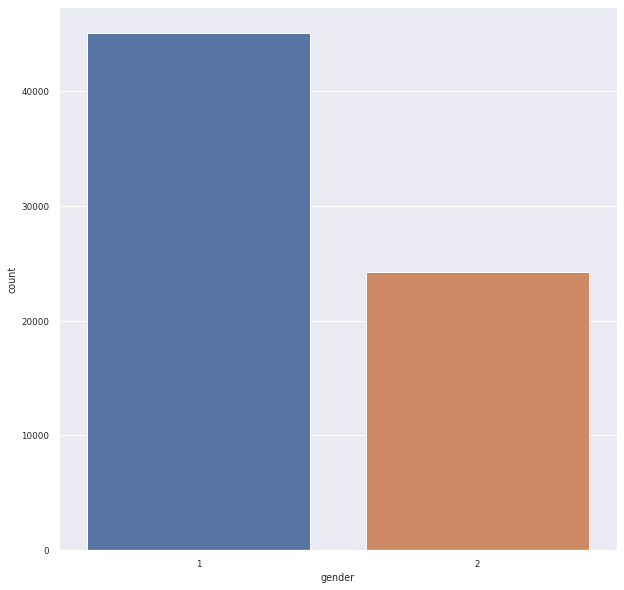

In [72]:
sns.countplot(cardio_vascular_data['gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


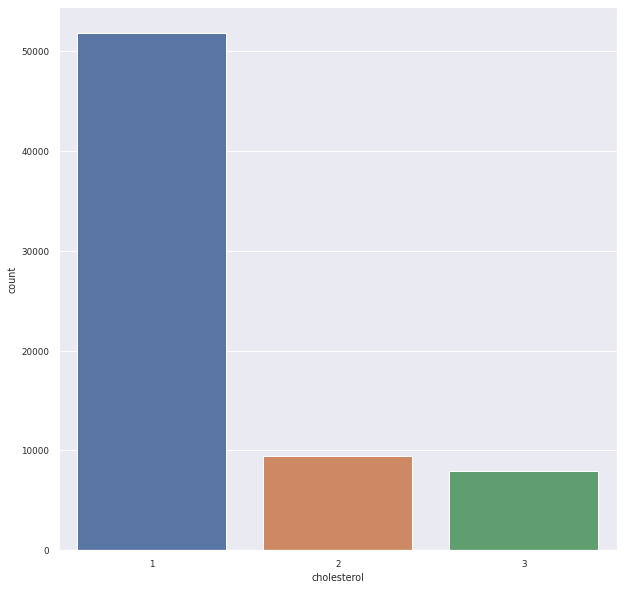

In [73]:
sns.countplot(cardio_vascular_data['cholesterol'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


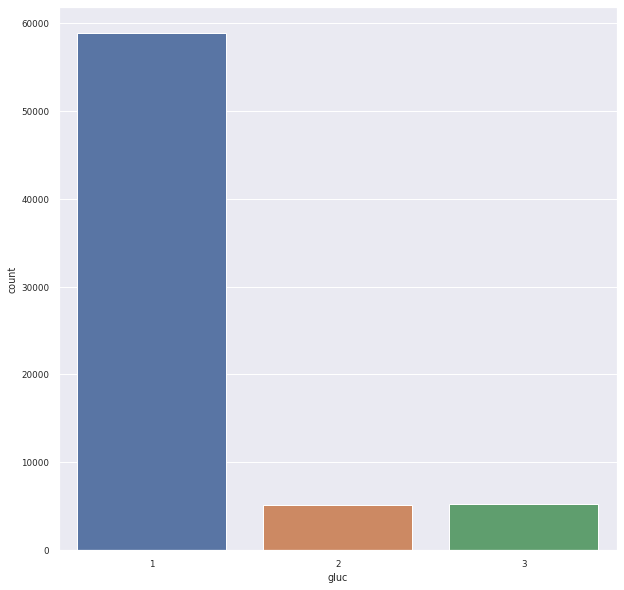

In [74]:
sns.countplot(cardio_vascular_data['gluc'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


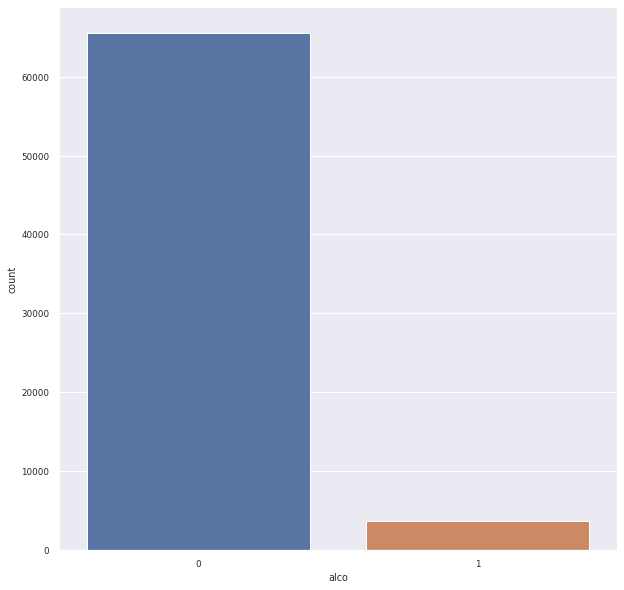

In [75]:
sns.countplot(cardio_vascular_data['alco'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


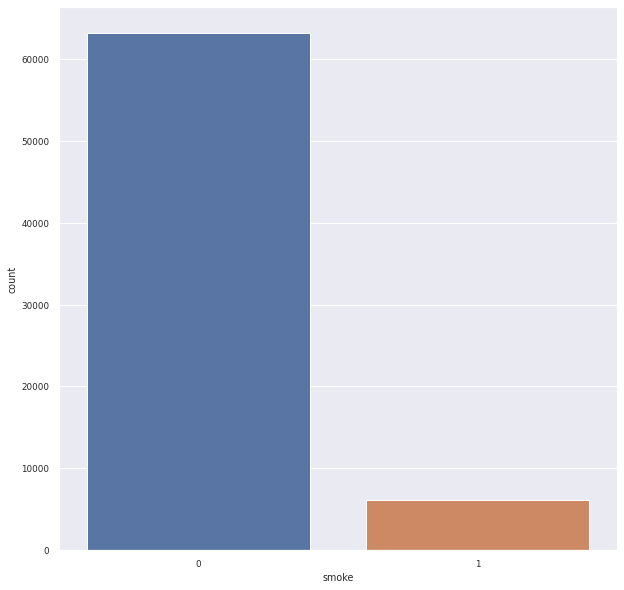

In [76]:
sns.countplot(cardio_vascular_data['smoke'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


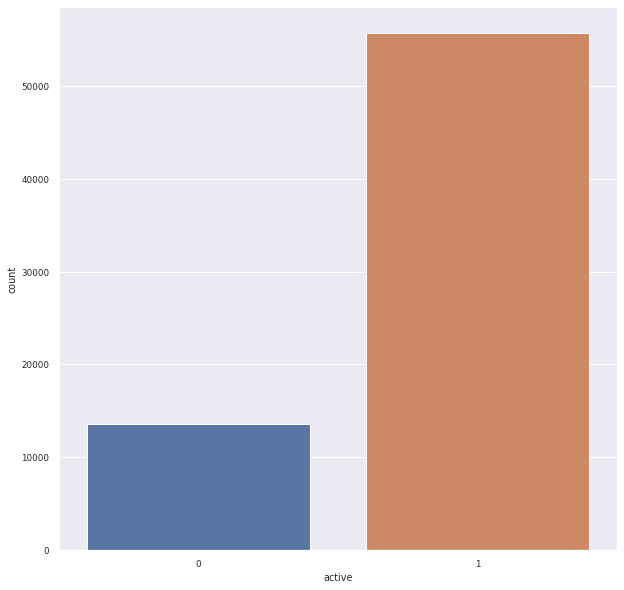

In [77]:
sns.countplot(cardio_vascular_data['active'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


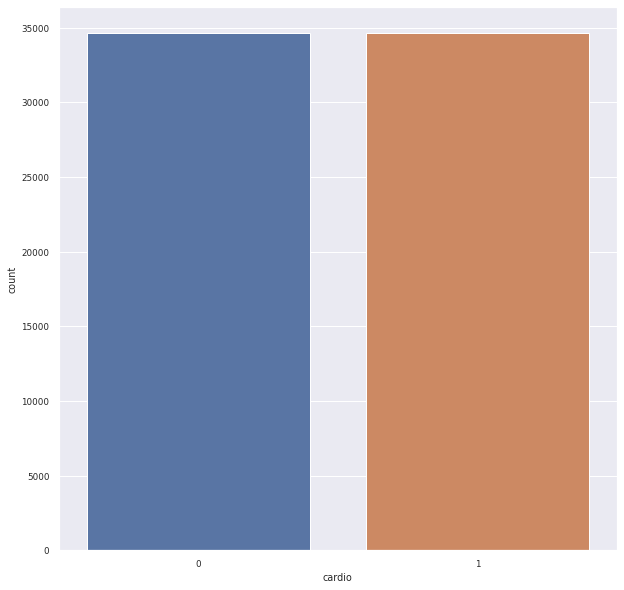

In [78]:
sns.countplot(cardio_vascular_data['cardio'])

# Data Preprocessing

In [79]:
#Checking the datatypes for all the attributes in the dataset
cardio_vascular_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [80]:
#Checking for null values in the dataset
cardio_vascular_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [81]:
#Checking for the starting and ending values to find out the outliers present in the dataset
cardio_vascular_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
#Age attribute is in the form of number of days. So, converting age to number of years.
cardio_vascular_data['age'] = cardio_vascular_data['age']/365.25

In [83]:
#Dropping the data entries where ap_hi and ap_lo are out of range.
cardio_vascular_data.drop(cardio_vascular_data.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [84]:
#Displaying the top 5 entries from the datatset to check if the data is preprocessed properly.
cardio_vascular_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.516769,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.104038,1,163,71.0,110,70,1,1,0,0,1,1
2,990,59.961670,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.832991,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.046543,1,155,62.0,120,80,1,1,0,0,1,0


# Correlation Matrix Plot 

### Correlation Matrix Visualization without Values 

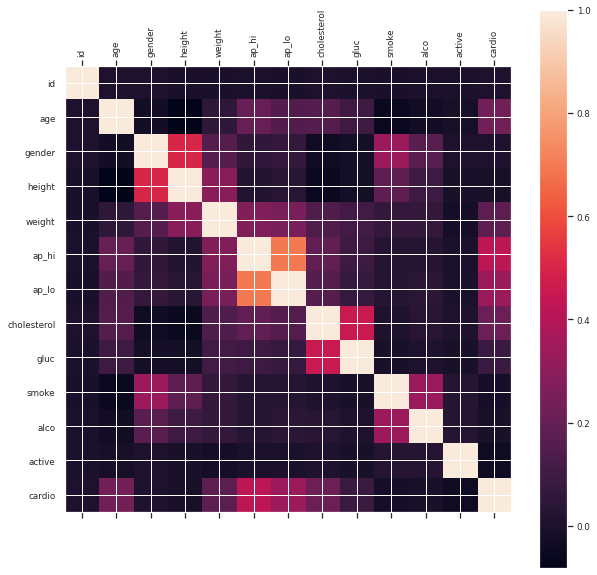

In [85]:
#Correlation matrix for finding out which attributes(features) are correlated.
rcParams['figure.figsize'] = 10,10
plt.matshow(cardio_vascular_data.corr())
plt.yticks(np.arange(cardio_vascular_data.shape[1]), cardio_vascular_data.columns ,rotation='horizontal')
plt.xticks(np.arange(cardio_vascular_data.shape[1]), cardio_vascular_data.columns, rotation='vertical')
plt.colorbar()

### Correlation Matrix Visualization with Values 

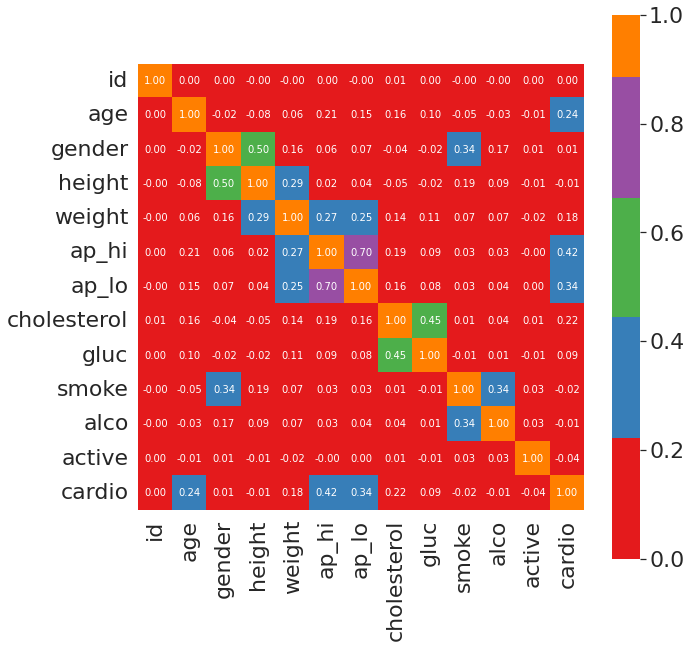

In [86]:
corrmat = cardio_vascular_data.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=2)
hm = sns.heatmap(corrmat,cmap = 'Set1', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 10},
             yticklabels = cardio_vascular_data.columns, xticklabels = cardio_vascular_data.columns)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febb9d65c10>,
      dtype=object)

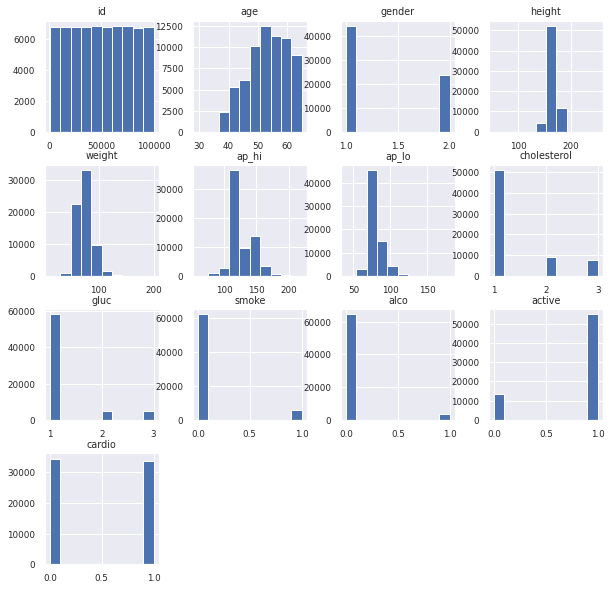

In [87]:
sns.set(font_scale=0.8)
cardio_vascular_data.hist()

In [88]:
#Dropping attribute "id" as it is not important for classifying the CVD 
#and setting X(input features) and y(target variable) for using the classification model on the data.
X = cardio_vascular_data.drop(['id','cardio'], axis=1)
y = cardio_vascular_data['cardio']

# Applying Machine Learning Model to the Processed Data 

# 1. Random Forest Classifier 

In [89]:
#Splitting the dataset into training and testing dataset.
#Tried Random Forest Classifier model for different number of Decision Trees.

acc__train_rfc = []
y_pred_train_rfc = []
acc__test_rfc = []
y_pred_test_rfc = []
cnt = 0

no_of_decision_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .66)

for i in no_of_decision_trees:
  random_forest_model = RandomForestClassifier(n_estimators=i, max_depth=8, random_state=0)
  random_forest_model.fit(X_train, y_train)
  y_pred_train_rfc.append(random_forest_model.predict(X_train))
  y_pred_test_rfc.append(random_forest_model.predict(X_test))

  acc__train_rfc.append(accuracy_score(y_train, y_pred_train_rfc[cnt]))
  acc__test_rfc.append(accuracy_score(y_test, y_pred_test_rfc[cnt]))

  cnt += 1

In [90]:
#Printing Training and Testing Accuracies for different number of decision trees.

for i in range(0,20):
  print("\nTraining and Testing Accuracy for ", no_of_decision_trees[i]," Decision Trees: ")
  print("Training Accuracy: ", acc__train_rfc[i])
  print("Testing Accuracy: ", acc__test_rfc[i])


Training and Testing Accuracy for  10  Decision Trees: 
Training Accuracy:  0.7401958602270198
Testing Accuracy:  0.7323627251911695

Training and Testing Accuracy for  20  Decision Trees: 
Training Accuracy:  0.7426886267527265
Testing Accuracy:  0.7344364280468311

Training and Testing Accuracy for  30  Decision Trees: 
Training Accuracy:  0.7431115067883374
Testing Accuracy:  0.7354300773318356

Training and Testing Accuracy for  40  Decision Trees: 
Training Accuracy:  0.7425550856888493
Testing Accuracy:  0.7362941201883614

Training and Testing Accuracy for  50  Decision Trees: 
Training Accuracy:  0.742243489873136
Testing Accuracy:  0.7357756944744459

Training and Testing Accuracy for  60  Decision Trees: 
Training Accuracy:  0.7424215446249722
Testing Accuracy:  0.7355596837603146

Training and Testing Accuracy for  70  Decision Trees: 
Training Accuracy:  0.7419764077453816
Testing Accuracy:  0.7358188966172722

Training and Testing Accuracy for  80  Decision Trees: 
Traini

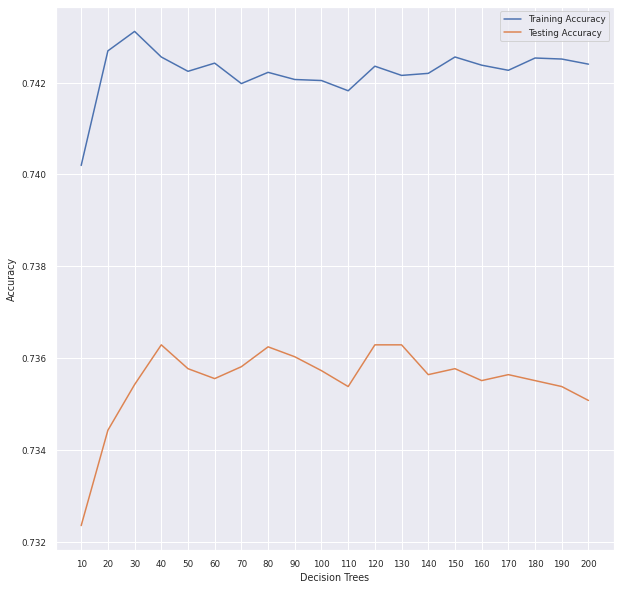

In [101]:
#Plotting Training and Testing Accuracies for different number of decision trees.

labels = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],labels)
plt.xlabel("Decision Trees")
plt.ylabel("Accuracy")
plt.plot(acc__train_rfc,label='Training Accuracy')
plt.plot(acc__test_rfc,label='Testing Accuracy')
plt.legend()

In [92]:
#Printing Testing and Training Accuracy and Confusion Matrix for the best number of decision trees.
#i.e. For the number of decision trees that has highest testing accuracy in Random Forest Classifier.

max_test_accuracy = max(acc__test_rfc)
index = acc__test_rfc.index(max_test_accuracy)
print("Maximum Testing Accuracy found for ", no_of_decision_trees[index], "Decision Trees.")
print("\nTraining Accuracy: ", acc__train_rfc[index])
print("Testing Accuracy: ", acc__test_rfc[index])

print("\n\nConfusion Matrix for the Training Dataset")
print(confusion_matrix(y_train, y_pred_train_rfc[index]))
print("\n\nConfusion Matrix for the Testing Dataset")
print(confusion_matrix(y_test, y_pred_test_rfc[index]))

Maximum Testing Accuracy found for  40 Decision Trees.

Training Accuracy:  0.7425550856888493
Testing Accuracy:  0.7362941201883614


Confusion Matrix for the Training Dataset
[[18271  4448]
 [ 7119 15092]]


Confusion Matrix for the Testing Dataset
[[9325 2350]
 [3754 7718]]


# 2. Logistic Regression

In [94]:
#Using Logistic Regression model for prediction.

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_train_lgr = pd.Series(logreg.predict(X_train))
y_pred_test_lgr = pd.Series(logreg.predict(X_test))

print("Confusion Matrix for the Training Dataset")
print(confusion_matrix(y_train, y_pred_train_lgr))
print("\n\nConfusion Matrix for the Testing Dataset")
print(confusion_matrix(y_test, y_pred_test_lgr))

acc_train_lgr = accuracy_score(y_train, y_pred_train_lgr)
print("\n\nTraining Accuracy: ", acc_train_lgr)
acc_test_lgr = accuracy_score(y_test, y_pred_test_lgr)
print("Testing Accuracy: ", acc_test_lgr)

Confusion Matrix for the Training Dataset
[[17227  5492]
 [ 7386 14825]]


Confusion Matrix for the Testing Dataset
[[8891 2784]
 [3815 7657]]


Training Accuracy:  0.7133763632316937
Testing Accuracy:  0.7149090594893507


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# 3. K Nearest Neighbours

In [95]:
#Using kNN for classification for different values of k

k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y_pred_train_knn = []
y_pred_test_knn = []
acc_train_knn = []
acc_test_knn = []
cnt = 0

for i in k:
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(X_train, y_train)

  y_pred_train_knn.append(classifier.predict(X_train))
  y_pred_test_knn.append(classifier.predict(X_test))

  acc_train_knn.append(accuracy_score(y_train, y_pred_train_knn[cnt]))
  acc_test_knn.append(accuracy_score(y_test, y_pred_test_knn[cnt]))
  
  cnt += 1

In [96]:
#Printing Testing and Training Accuracies for different values of k.

for i in k:
  print("\nTraining and Testing Accuracy for k =", i)
  print("Training Accuracy: ", acc_train_knn[i-2])
  print("Testing Accuracy: ", acc_test_knn[i-2])


Training and Testing Accuracy for k = 2
Training Accuracy:  0.8115958157133318
Testing Accuracy:  0.6400829481142265

Training and Testing Accuracy for k = 3
Training Accuracy:  0.8148675717783218
Testing Accuracy:  0.6731757895191601

Training and Testing Accuracy for k = 4
Training Accuracy:  0.7763632316937459
Testing Accuracy:  0.6733485980904653

Training and Testing Accuracy for k = 5
Training Accuracy:  0.7795682172267973
Testing Accuracy:  0.6889013695079276

Training and Testing Accuracy for k = 6
Training Accuracy:  0.7621856220787893
Testing Accuracy:  0.6910614766492418

Training and Testing Accuracy for k = 7
Training Accuracy:  0.7653460939238816
Testing Accuracy:  0.6994858945003672

Training and Testing Accuracy for k = 8
Training Accuracy:  0.7546628088137102
Testing Accuracy:  0.7000043202142826

Training and Testing Accuracy for k = 9
Training Accuracy:  0.7546628088137102
Testing Accuracy:  0.7032444809262539

Training and Testing Accuracy for k = 10
Training Accur

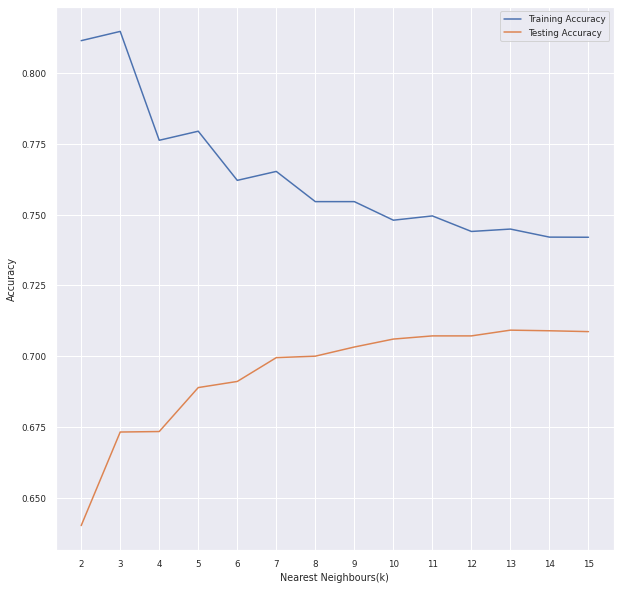

In [102]:
#Plotting Testing and Training Accuracies for different values of k.

labels = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels)
plt.xlabel("Nearest Neighbours(k)")
plt.ylabel("Accuracy")
plt.plot(acc_train_knn,label='Training Accuracy')
plt.plot(acc_test_knn,label='Testing Accuracy')
plt.legend()

In [98]:
#Printing Testing and Training Accuracy and Confusion Matrix for the best value of k.
#i.e. For the value of k that has highest testing accuracy in kNN.

max_test_accuracy = max(acc_test_knn)
index = acc_test_knn.index(max_test_accuracy)
print("Maximum Testing Accuracy found for value of k =", k[index])
print("\nTraining Accuracy: ", acc_train_knn[index])
print("Testing Accuracy: ", acc_test_knn[index])

print("\n\nConfusion Matrix for the Training Dataset")
print(confusion_matrix(y_train, y_pred_train_knn[index]))
print("\n\nConfusion Matrix for the Testing Dataset")
print(confusion_matrix(y_test, y_pred_test_knn[index]))

Maximum Testing Accuracy found for value of k = 13

Training Accuracy:  0.7449588248386378
Testing Accuracy:  0.7092063766362812


Confusion Matrix for the Training Dataset
[[17863  4856]
 [ 6603 15608]]


Confusion Matrix for the Testing Dataset
[[8735 2940]
 [3791 7681]]


# 4. Support Vector Classifier (LinearSVC)

In [99]:
support_vector_classifier = svm.LinearSVC(dual=False) 
support_vector_classifier.fit(X_train,y_train)

y_pred_train_svc = support_vector_classifier.predict(X_train) 
y_pred_test_svc = support_vector_classifier.predict(X_test)

print("Confusion Matrix for the Training Dataset") 
print(confusion_matrix(y_train, y_pred_train_svc)) 
print("\n\nConfusion Matrix for the Testing Dataset") 
print(confusion_matrix(y_test, y_pred_test_svc))

acc_train_svc = accuracy_score(y_train, y_pred_train_svc) 
print("\n\nTraining Accuracy: ", acc_train_svc) 
acc_test_svc = accuracy_score(y_test, y_pred_test_svc) 
print("Testing Accuracy: ", acc_test_svc)

Confusion Matrix for the Training Dataset
[[17972  4747]
 [ 7615 14596]]


Confusion Matrix for the Testing Dataset
[[9282 2393]
 [3894 7578]]


Training Accuracy:  0.7248608947251279
Testing Accuracy:  0.7283881280511514


# 5. XG-Boost Classifier (eXtreme Gradient Boosting)

In [100]:
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train,y_train)

y_pred_train_xgb = xgb_classifier.predict(X_train) 
y_pred_test_xgb = xgb_classifier.predict(X_test)

print("Confusion Matrix for the Training Dataset") 
print(confusion_matrix(y_train, y_pred_train_xgb)) 
print("\n\nConfusion Matrix for the Testing Dataset") 
print(confusion_matrix(y_test, y_pred_test_xgb))

acc_train_xgb = accuracy_score(y_train, y_pred_train_xgb) 
print("\n\nTraining Accuracy: ", acc_train_xgb) 
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb) 
print("Testing Accuracy: ", acc_test_xgb)

Confusion Matrix for the Training Dataset
[[17791  4928]
 [ 6851 15360]]


Confusion Matrix for the Testing Dataset
[[9161 2514]
 [3603 7869]]


Training Accuracy:  0.7378366347651903
Testing Accuracy:  0.7357324923316196
